In [1017]:
# imports

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor



In [1018]:
pd.set_option("display.max_rows",None) 
pd.set_option("display.max_columns",None) 

df1 = pd.read_csv("./DATASET/disease_outbreak_data.csv")

In [1019]:
# one hot encode region and risk category
df1 = pd.get_dummies(df1, columns=['region_type', 'outbreak_risk_category'])

In [1020]:
vaccination_rate_mean = df1["vaccination_rate"].mean()
df1["vaccination_rate"] = df1["vaccination_rate"].fillna(vaccination_rate_mean)

In [1021]:
healthcare_accessibility_score_mean = df1["healthcare_accessibility_score"].mean()
df1["healthcare_accessibility_score"] = df1["healthcare_accessibility_score"].fillna(healthcare_accessibility_score_mean)

In [1022]:
df1.head()

,region_id,population_density,median_income,elderly_percentage,child_percentage,hospitals_per_100k,vaccination_rate,healthcare_accessibility_score,avg_temperature,avg_humidity,annual_rainfall,air_quality_index,disease_incidents_last_year,outbreak_frequency_5years,avg_outbreak_duration,daily_commuter_percentage,international_travel_freq,public_transport_usage,risk_score,region_type_Rural,region_type_Suburban,region_type_Urban,outbreak_risk_category_High Risk,outbreak_risk_category_Low Risk,outbreak_risk_category_Medium Risk
0,0,1926.071460,59715.328072,13.120373,16.559945,1.587125,0.773235,0.700558,27.615149,65.403629,530.876741,146.389182,111,4,22.349630,44.466126,0.134625,11.383746,38.671740,0,1,0,0,0,1
1,1,1099.791458,46234.340479,22.367720,18.824620,2.974846,0.693353,0.829970,19.180664,64.015377,1175.748878,31.591795,121,9,16.092275,23.906885,3.452742,36.409150,38.168486,0,1,0,0,0,1
2,2,5961.415281,62338.173682,16.234222,20.200680,3.866776,0.686971,0.884792,13.895782,68.756641,1909.248412,137.379282,103,7,21.408879,40.833370,4.809743,60.672031,54.447595,0,0,1,0,0,1
3,3,274.449145,56912.244502,22.140685,17.759992,0.796274,0.533053,0.407818,20.429617,51.170074,1092.322277,65.218581,106,4,28.526018,46.043081,4.583302,61.002315,45.836201,1,0,0,0,0,1
4,4,643.115175,72034.119281,23.318447,20.912978,1.912083,0.712249,0.591463,14.380508,78.585605,1773.370736,116.607543,92,8,24.213258,24.435633,2.252749,22.103152,48.289559,0,1,0,0,0,1


In [1023]:
df1.head()

df1_to_normalize = df1.drop(['region_id','region_type_Rural', 'region_type_Suburban', 'region_type_Urban',
       'outbreak_risk_category_High Risk', 'outbreak_risk_category_Low Risk',
       'outbreak_risk_category_Medium Risk'], axis=1)



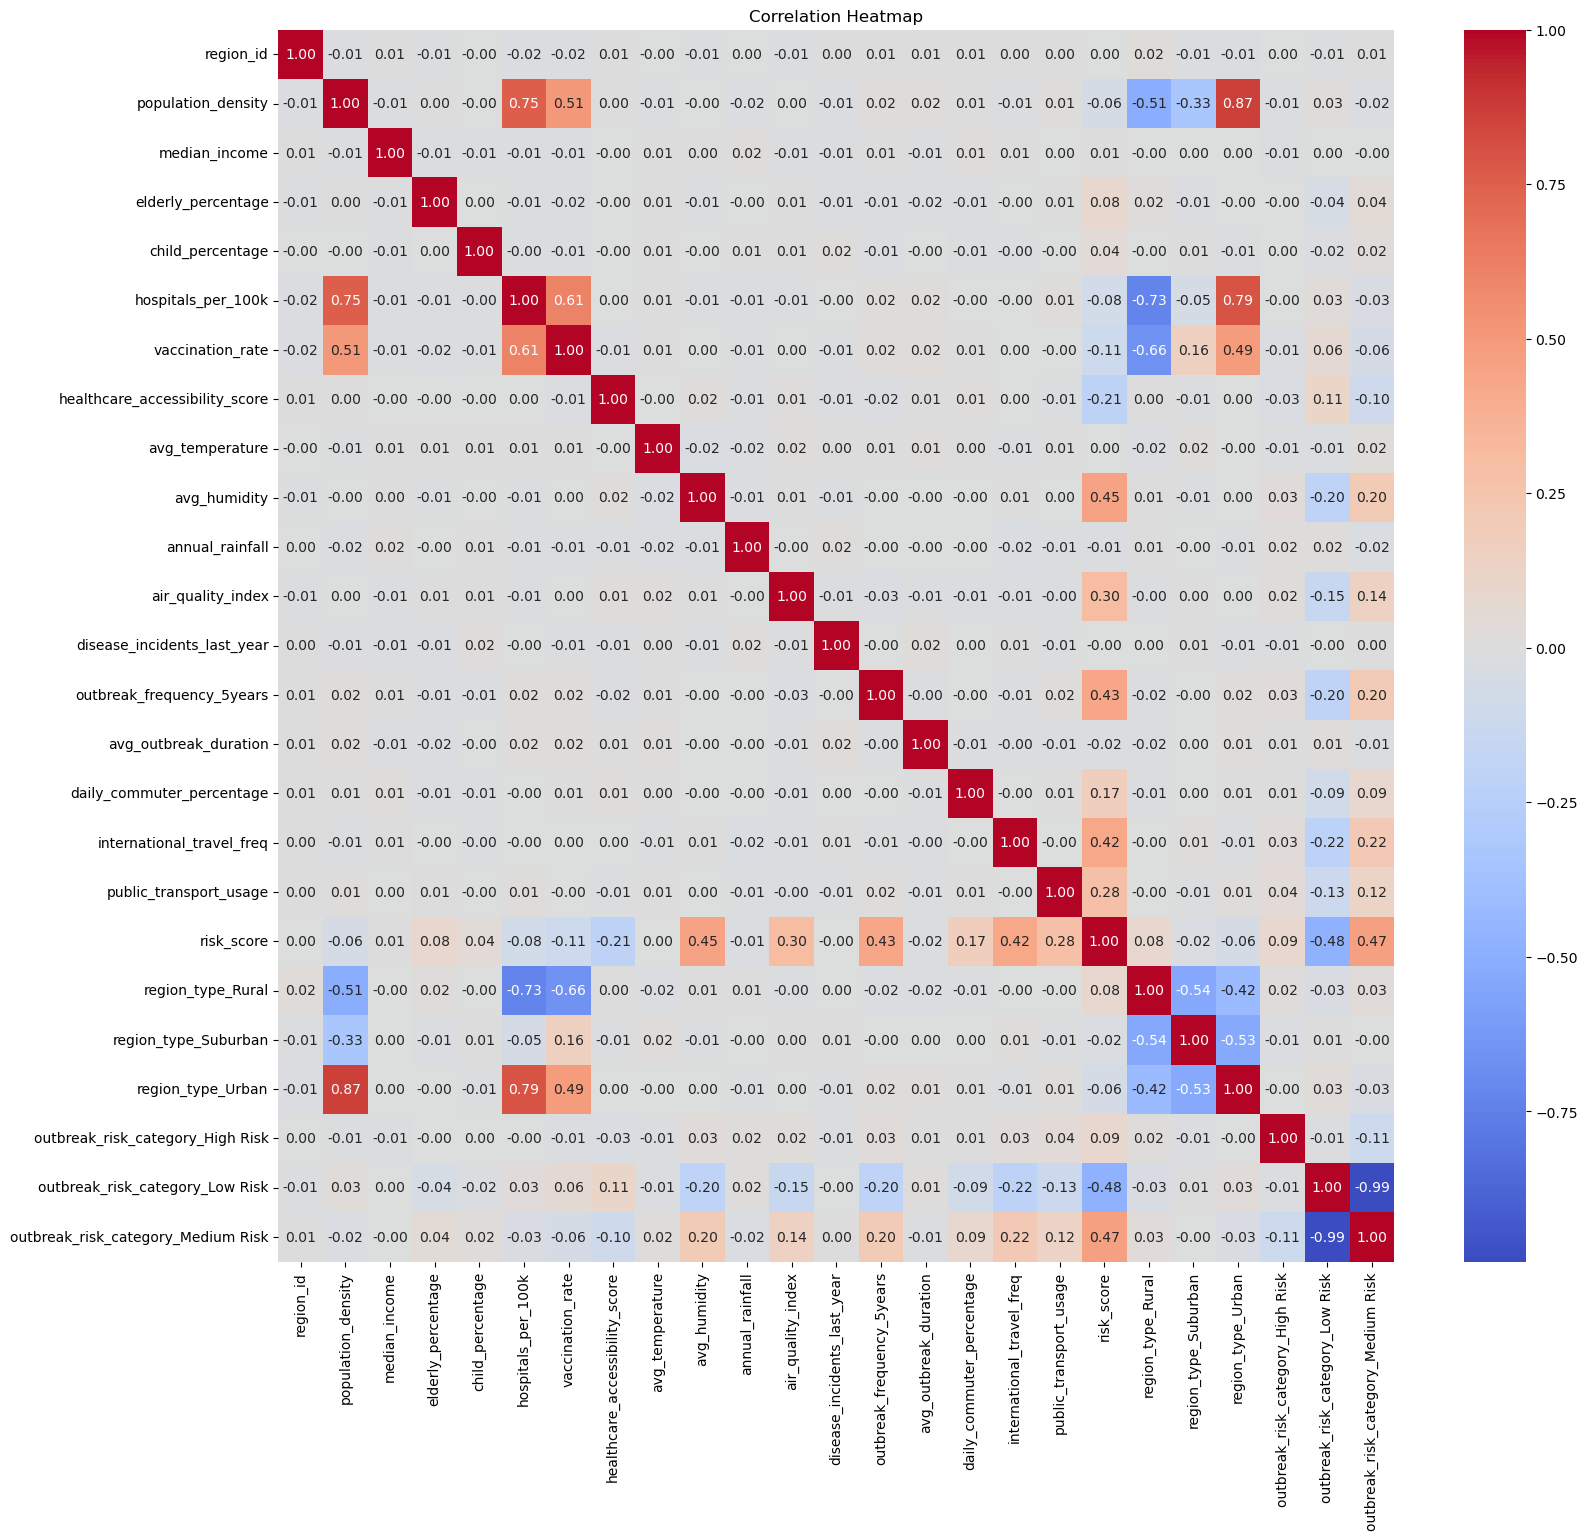

In [1024]:
correlation_matrix = df1.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Title
plt.title('Correlation Heatmap')
plt.show()

In [1025]:
df1.head()

,region_id,population_density,median_income,elderly_percentage,child_percentage,hospitals_per_100k,vaccination_rate,healthcare_accessibility_score,avg_temperature,avg_humidity,annual_rainfall,air_quality_index,disease_incidents_last_year,outbreak_frequency_5years,avg_outbreak_duration,daily_commuter_percentage,international_travel_freq,public_transport_usage,risk_score,region_type_Rural,region_type_Suburban,region_type_Urban,outbreak_risk_category_High Risk,outbreak_risk_category_Low Risk,outbreak_risk_category_Medium Risk
0,0,1926.071460,59715.328072,13.120373,16.559945,1.587125,0.773235,0.700558,27.615149,65.403629,530.876741,146.389182,111,4,22.349630,44.466126,0.134625,11.383746,38.671740,0,1,0,0,0,1
1,1,1099.791458,46234.340479,22.367720,18.824620,2.974846,0.693353,0.829970,19.180664,64.015377,1175.748878,31.591795,121,9,16.092275,23.906885,3.452742,36.409150,38.168486,0,1,0,0,0,1
2,2,5961.415281,62338.173682,16.234222,20.200680,3.866776,0.686971,0.884792,13.895782,68.756641,1909.248412,137.379282,103,7,21.408879,40.833370,4.809743,60.672031,54.447595,0,0,1,0,0,1
3,3,274.449145,56912.244502,22.140685,17.759992,0.796274,0.533053,0.407818,20.429617,51.170074,1092.322277,65.218581,106,4,28.526018,46.043081,4.583302,61.002315,45.836201,1,0,0,0,0,1
4,4,643.115175,72034.119281,23.318447,20.912978,1.912083,0.712249,0.591463,14.380508,78.585605,1773.370736,116.607543,92,8,24.213258,24.435633,2.252749,22.103152,48.289559,0,1,0,0,0,1


In [1026]:
scaler = MinMaxScaler()

cols = df1_to_normalize.columns

normalized_df3 = pd.DataFrame()

normalized_df3[cols] = pd.DataFrame(scaler.fit_transform(df1[cols]))

cols_to_add = ["region_id", "region_type_Rural", 'region_type_Suburban', 'region_type_Urban',
       'outbreak_risk_category_High Risk', 'outbreak_risk_category_Low Risk',
       'outbreak_risk_category_Medium Risk']

normalized_df3 = pd.concat([normalized_df3, df1[cols_to_add]], axis=1)

normalized_df3.head()


,population_density,median_income,elderly_percentage,child_percentage,hospitals_per_100k,vaccination_rate,healthcare_accessibility_score,avg_temperature,avg_humidity,annual_rainfall,air_quality_index,disease_incidents_last_year,outbreak_frequency_5years,avg_outbreak_duration,daily_commuter_percentage,international_travel_freq,public_transport_usage,risk_score,region_id,region_type_Rural,region_type_Suburban,region_type_Urban,outbreak_risk_category_High Risk,outbreak_risk_category_Low Risk,outbreak_risk_category_Medium Risk
0,0.191770,0.583070,0.155949,0.155954,0.241522,0.780766,0.601178,0.669995,0.708102,0.020443,0.248146,0.628571,0.444444,0.617457,0.611697,0.007019,0.023050,0.448937,0,0,1,0,0,0,1
1,0.109050,0.456141,0.618370,0.382448,0.549969,0.552457,0.860032,0.481675,0.680333,0.450463,0.003379,0.771429,1.000000,0.304550,0.097670,0.684304,0.440251,0.437690,1,0,1,0,0,0,1
2,0.595756,0.607765,0.311660,0.520071,0.748217,0.534218,0.969689,0.363677,0.775173,0.939583,0.228936,0.514286,0.777778,0.570414,0.520870,0.961291,0.844740,0.801493,2,0,0,1,0,0,1
3,0.026423,0.556678,0.607017,0.275973,0.065740,0.094314,0.015633,0.509561,0.423387,0.394832,0.075077,0.557143,0.444444,0.926316,0.651124,0.915071,0.850247,0.609047,3,1,0,0,0,0,1
4,0.063331,0.699056,0.665912,0.591309,0.313750,0.606463,0.382965,0.374500,0.971783,0.848976,0.184647,0.357143,0.888889,0.710650,0.110890,0.439365,0.201755,0.663874,4,0,1,0,0,0,1


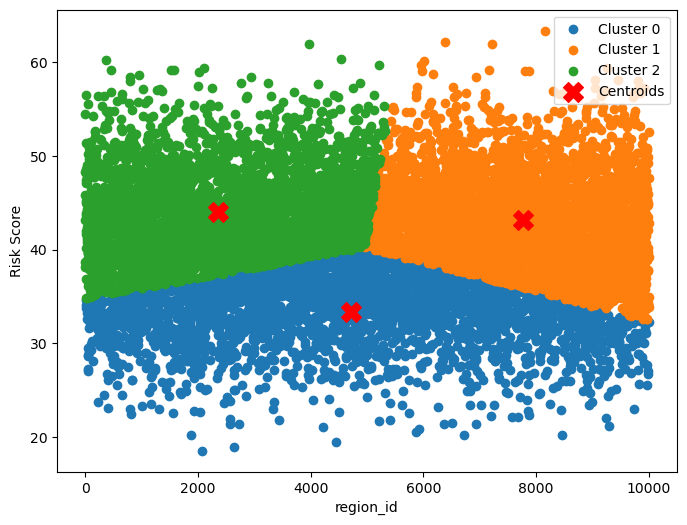

In [1027]:
features = ['region_id', 'risk_score']
X = df1[features]

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df1['Cluster'] = kmeans.fit_predict(scaled_X)

plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = df1[df1['Cluster'] == cluster]
    plt.scatter(cluster_data['region_id'], cluster_data['risk_score'], label=f'Cluster {cluster}')

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('region_id')
plt.ylabel('Risk Score')
plt.legend()
plt.show()

In [1082]:
# Insight 1
# the above plot shows cluster 1 & 2 are at risk as they are at the mid to higher end of risk score
# below are the regions

print(len(df1[df1["Cluster"] == 0]["region_id"]))
print(len(df1[df1["Cluster"] == 1]["region_id"]))
print(len(df1[df1["Cluster"] == 2]["region_id"]))



3200
3644
3156


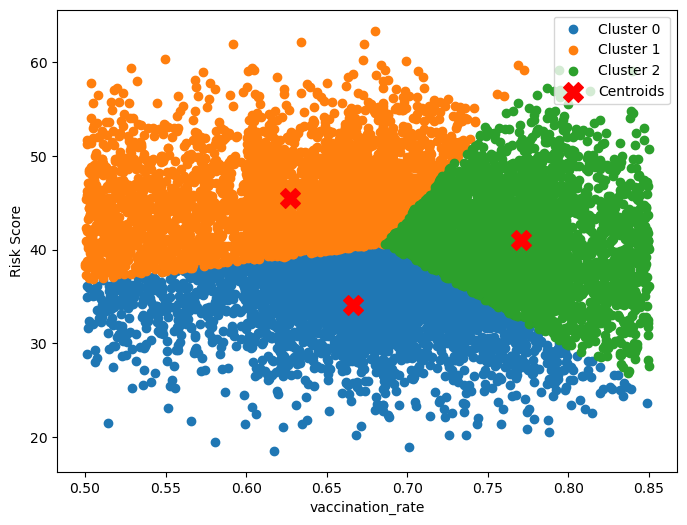

In [1029]:
features = ['vaccination_rate', 'risk_score']
X = df1[features]

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df1['Cluster'] = kmeans.fit_predict(scaled_X)

plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = df1[df1['Cluster'] == cluster]
    plt.scatter(cluster_data['vaccination_rate'], cluster_data['risk_score'], label=f'Cluster {cluster}')

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('vaccination_rate')
plt.ylabel('Risk Score')
plt.legend()
plt.show()



/var/folders/lm/x0n0qhz55jq8sbtvvzpkqj2m0000gn/T/ipykernel_30810/2995254739.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_vacc_rate_df['Cluster'] = kmeans.fit_predict(scaled_X)


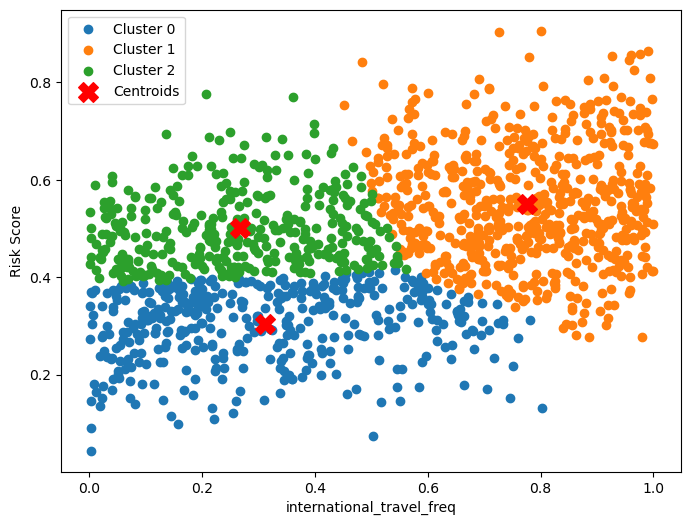

In [1030]:
high_vacc_rate_df = normalized_df3[normalized_df3["vaccination_rate"] > 0.80]
# high_vacc_rate_df.head()

high_vacc_rate_df.reset_index(drop=True, inplace=True)

features = ['international_travel_freq', 'risk_score']
X = high_vacc_rate_df[features]

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
high_vacc_rate_df['Cluster'] = kmeans.fit_predict(scaled_X)

plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = high_vacc_rate_df[high_vacc_rate_df['Cluster'] == cluster]
    plt.scatter(cluster_data['international_travel_freq'], cluster_data['risk_score'], label=f'Cluster {cluster}')

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('international_travel_freq')
plt.ylabel('Risk Score')
plt.legend()
plt.show()

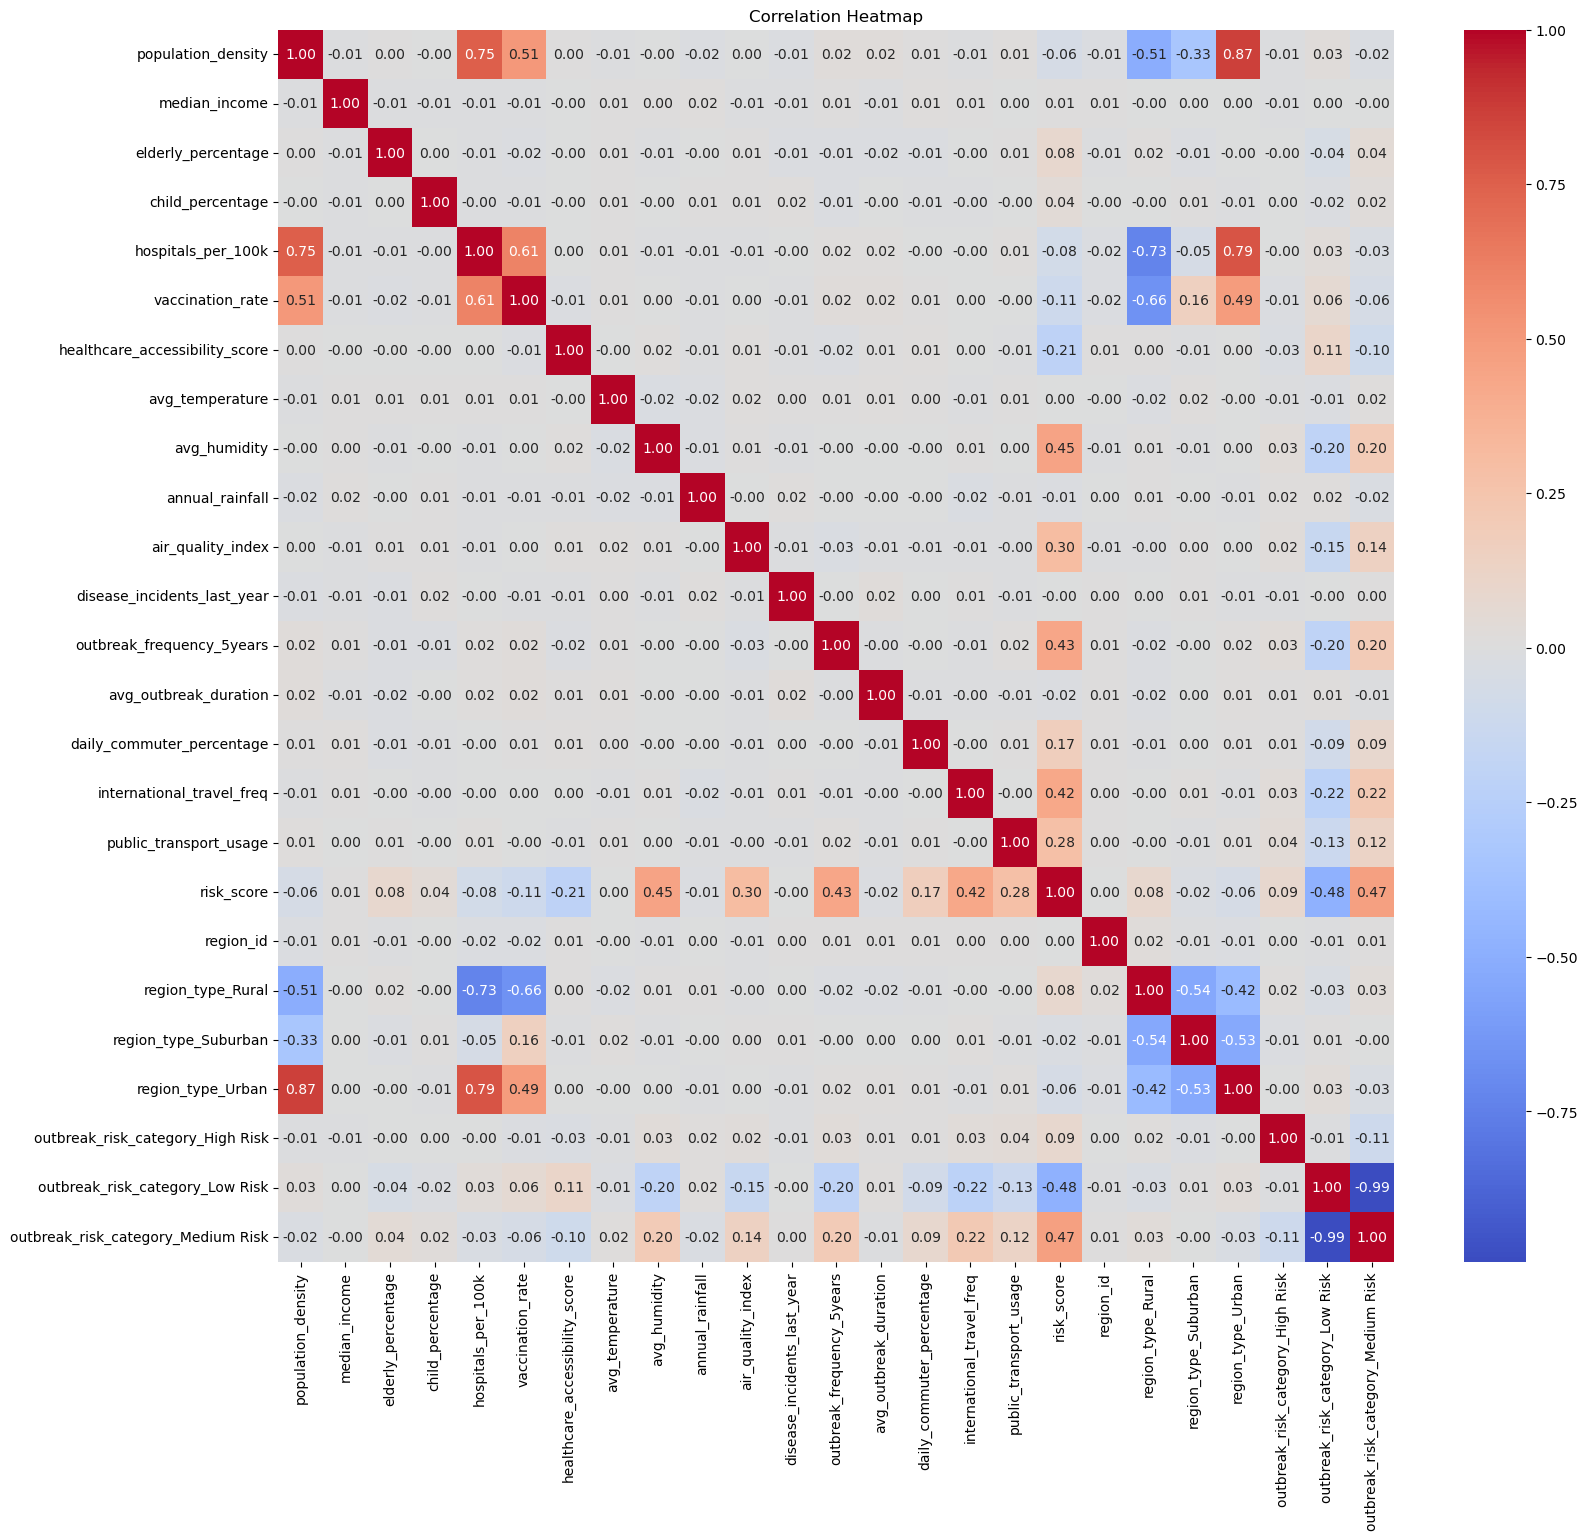

In [1031]:
correlation_matrix = normalized_df3.corr()


plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Title
plt.title('Correlation Heatmap')
plt.show()

In [1032]:
# Insight2

# A
# from the above heatmap it can be found that the risk score is usually high when there is high travelling involved,
# international or public transport usage
# i.e the disease has the high chance of spreading in travelling crowd

# B
# high humidity, low air quality and regions with high outbreak history are more prone to higher risk score


# C
# Urban regions has high vaccination_rate

In [1033]:
print(df1["risk_score"].min())
print(df1["risk_score"].mean())
print(df1["risk_score"].max())

18.58313397078571
40.38498435478206
63.33018527176775


In [1034]:
# above average risk
high_risk_regions = df1[df1["risk_score"] > 40.38]

high_risk_regions["Cluster"].value_counts()

1    3284
2    1709
0      11
Name: Cluster, dtype: int64

In [1035]:
# Insight
# as mentioned above, validating again, cluster 1 & 2  regions fall under high risk bucket, with risk score above average.
# cluseert 1 regions being most at risk
# and cluster 0 regions least at risk

In [1036]:
# very high risk cluster regions 

high_risk_regions = df1[df1["risk_score"] > 55]

high_risk_regions["Cluster"].value_counts()

1    101
2     12
Name: Cluster, dtype: int64

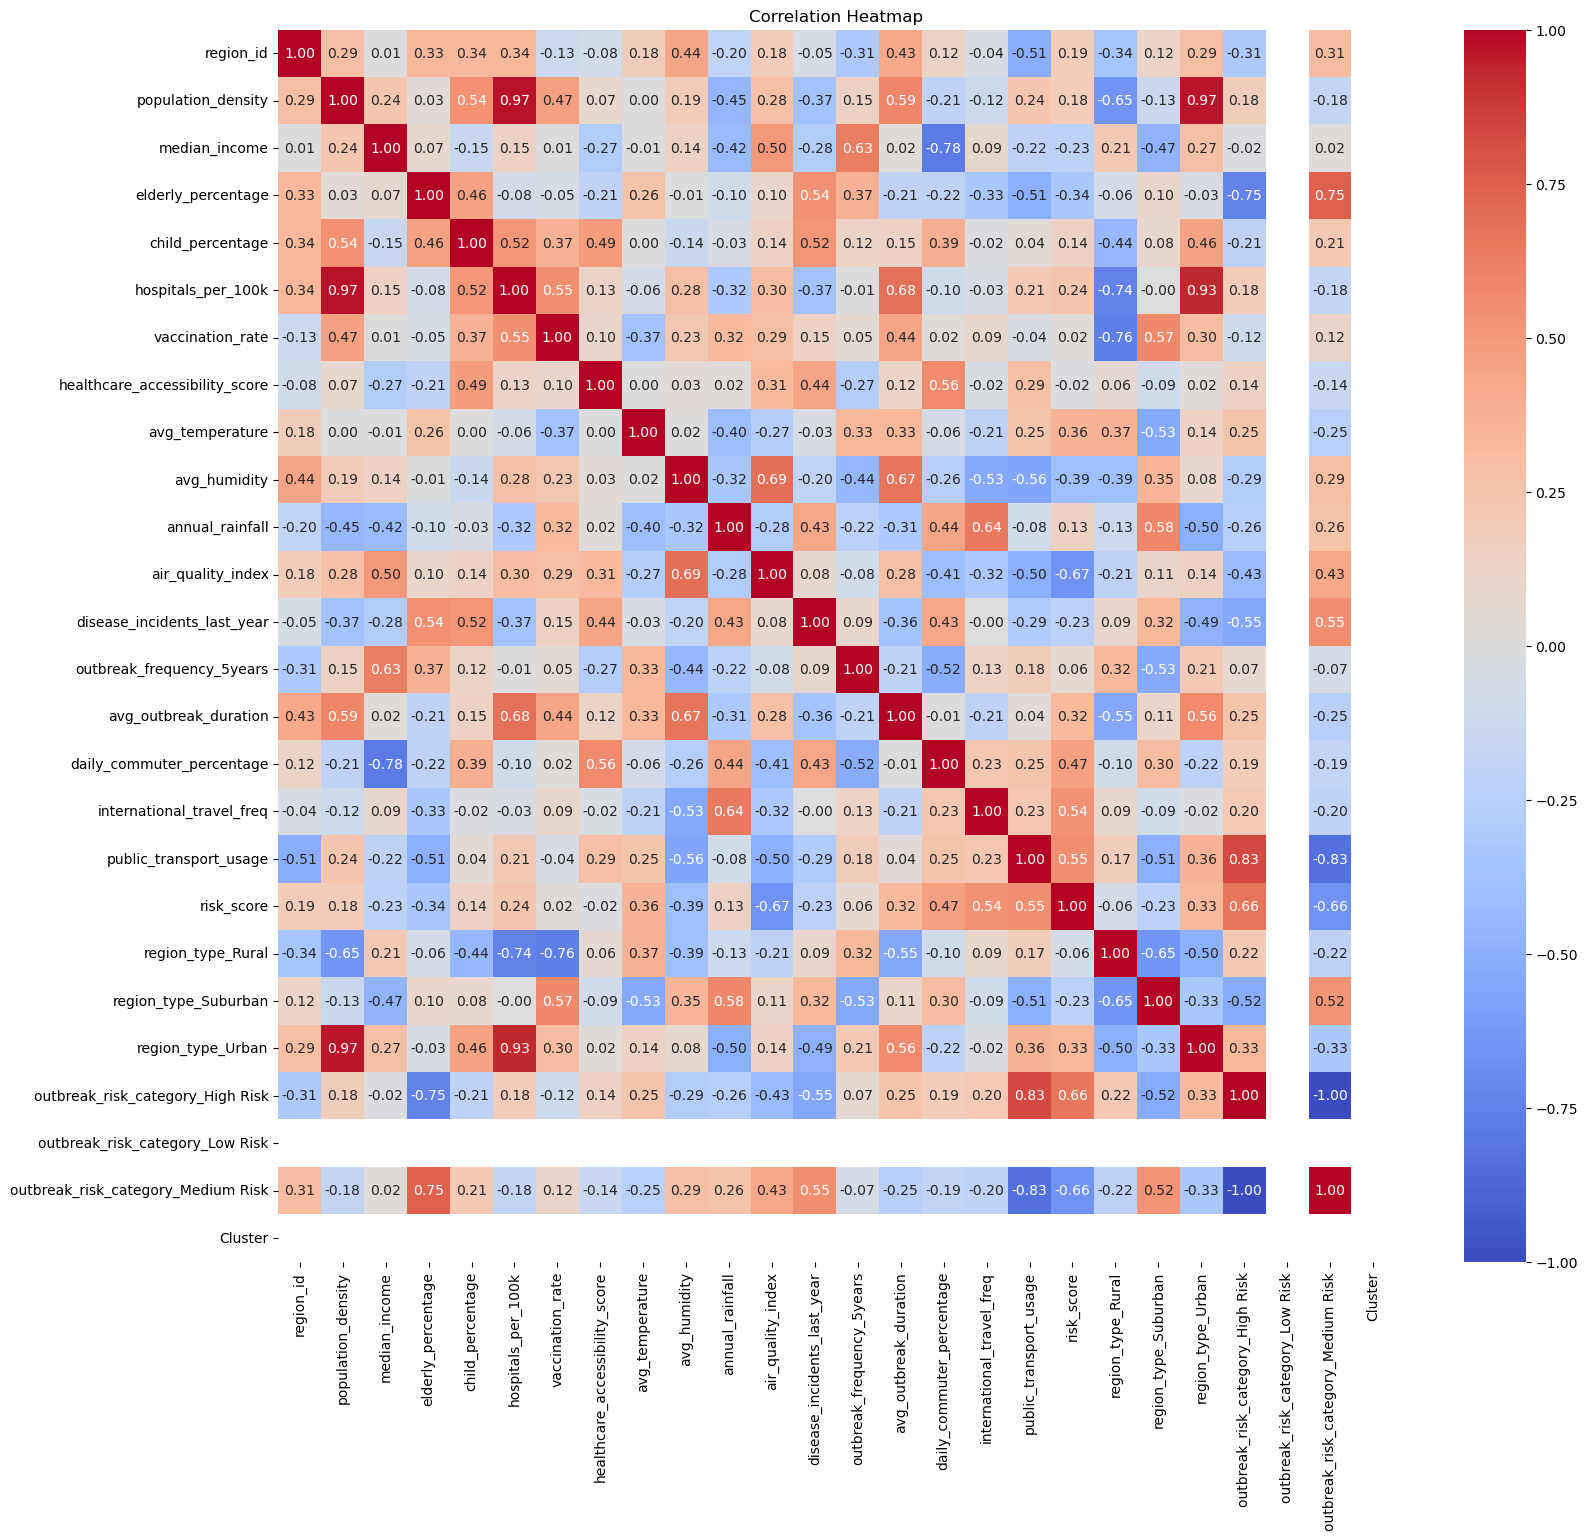

In [1037]:
# Top 10 high risk score regions

top10_high_risk_regions = high_risk_regions.nlargest(10, "risk_score")

top10_high_risk_regions_correlation_matrix = top10_high_risk_regions.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(top10_high_risk_regions_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Title
plt.title('Correlation Heatmap')
plt.show()

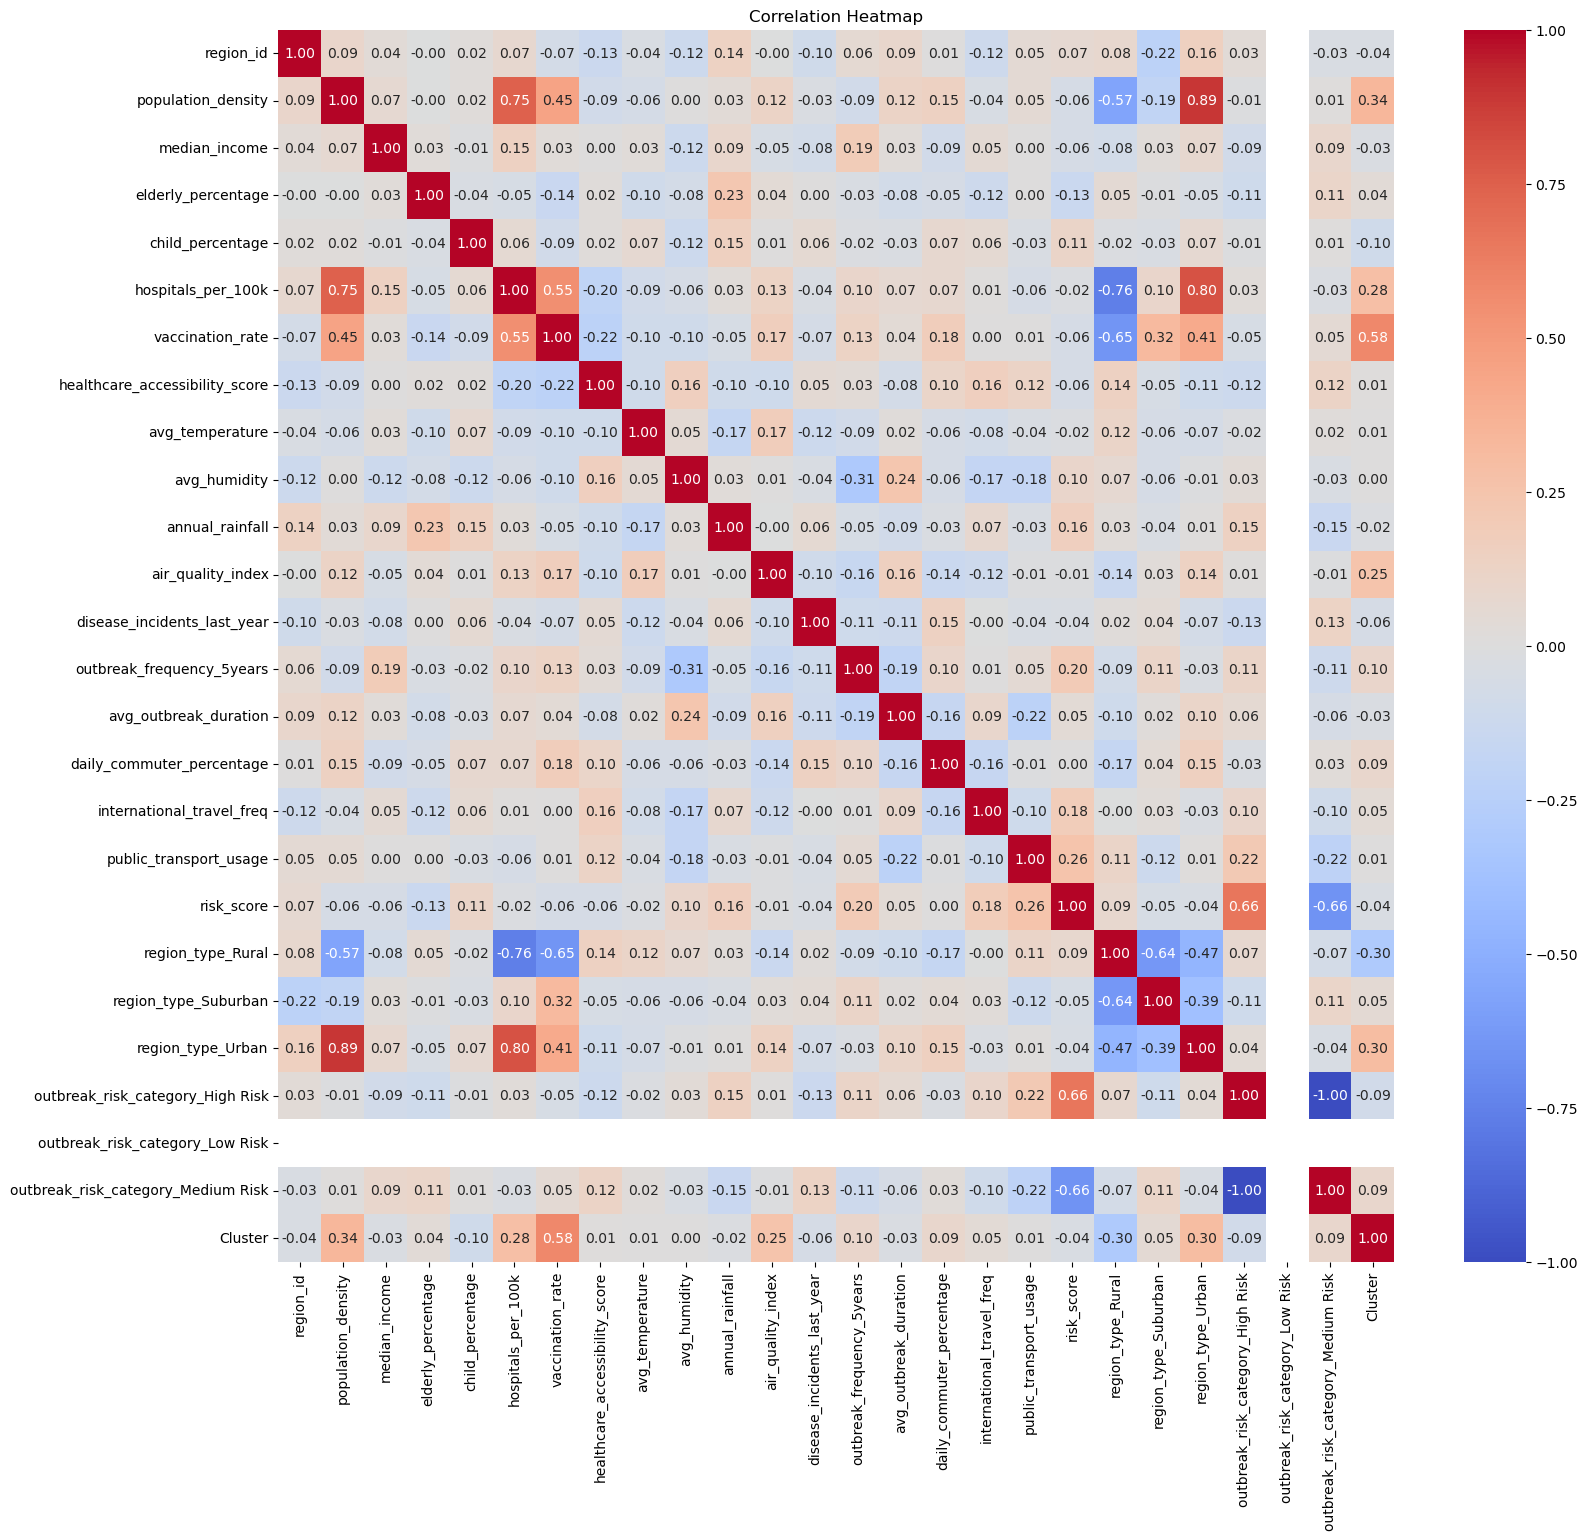

In [1038]:
high_risk_regions_correlation_matrix = high_risk_regions.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(high_risk_regions_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Title
plt.title('Correlation Heatmap')
plt.show()

In [1039]:
normalized_df3.head()

,population_density,median_income,elderly_percentage,child_percentage,hospitals_per_100k,vaccination_rate,healthcare_accessibility_score,avg_temperature,avg_humidity,annual_rainfall,air_quality_index,disease_incidents_last_year,outbreak_frequency_5years,avg_outbreak_duration,daily_commuter_percentage,international_travel_freq,public_transport_usage,risk_score,region_id,region_type_Rural,region_type_Suburban,region_type_Urban,outbreak_risk_category_High Risk,outbreak_risk_category_Low Risk,outbreak_risk_category_Medium Risk
0,0.191770,0.583070,0.155949,0.155954,0.241522,0.780766,0.601178,0.669995,0.708102,0.020443,0.248146,0.628571,0.444444,0.617457,0.611697,0.007019,0.023050,0.448937,0,0,1,0,0,0,1
1,0.109050,0.456141,0.618370,0.382448,0.549969,0.552457,0.860032,0.481675,0.680333,0.450463,0.003379,0.771429,1.000000,0.304550,0.097670,0.684304,0.440251,0.437690,1,0,1,0,0,0,1
2,0.595756,0.607765,0.311660,0.520071,0.748217,0.534218,0.969689,0.363677,0.775173,0.939583,0.228936,0.514286,0.777778,0.570414,0.520870,0.961291,0.844740,0.801493,2,0,0,1,0,0,1
3,0.026423,0.556678,0.607017,0.275973,0.065740,0.094314,0.015633,0.509561,0.423387,0.394832,0.075077,0.557143,0.444444,0.926316,0.651124,0.915071,0.850247,0.609047,3,1,0,0,0,0,1
4,0.063331,0.699056,0.665912,0.591309,0.313750,0.606463,0.382965,0.374500,0.971783,0.848976,0.184647,0.357143,0.888889,0.710650,0.110890,0.439365,0.201755,0.663874,4,0,1,0,0,0,1


In [1040]:
X = normalized_df3.drop("risk_score", axis=1)
y = normalized_df3["risk_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1041]:
# random forest

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("mse",mse_rf)
print("R2 score", r2_rf)

comparision = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_rf})
print(comparision)


mse 0.002376538761107527
R2 score 0.8815802125478289
        Actual  Predicted
6252  0.102911   0.199758
4684  0.737699   0.582482
1731  0.546621   0.594997
4742  0.446648   0.470309
4521  0.432651   0.431086
6340  0.530432   0.498871
576   0.199603   0.185771
5202  0.323771   0.383427
6363  0.560891   0.521521
439   0.357273   0.354088
2750  0.735260   0.710797
7487  0.425487   0.396503
5272  0.360535   0.392524
5653  0.616677   0.614292
3999  0.658218   0.586704
6033  0.408024   0.439069
582   0.594831   0.633805
9930  0.319184   0.339729
7051  0.691591   0.682238
8158  0.660933   0.634407
9896  0.586655   0.594713
2249  0.366873   0.458016
4640  0.514411   0.518589
9485  0.624013   0.551753
4947  0.210343   0.177040
9920  0.255302   0.377472
1963  0.448712   0.398796
8243  0.680897   0.652586
6590  0.359081   0.410254
8847  0.533661   0.556414
321   0.410163   0.510779
2678  0.275122   0.296622
4625  0.683246   0.631051
4949  0.392903   0.481757
8328  0.446803   0.448550
3337  0.097

In [1042]:
dt_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

dt_regressor.fit(X_train, y_train)

y_pred_dt = dt_regressor.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")

Mean Squared Error: 0.01
R² Score: 0.43


In [1043]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)

y_pred_gb = gbr.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error: {mse_gb:.2f}")
print(f"R² Score: {r2_gb:.2f}")

Mean Squared Error: 0.00
R² Score: 0.94


In [1044]:
xgbr = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    objective='reg:squarederror'
)

# Train the model
xgbr.fit(X_train, y_train)

# Make predictions
y_pred_xg = xgbr.predict(X_test)

# Evaluate the model
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print(f"Mean Squared Error: {mse_xg:.2f}")
print(f"R² Score: {r2_xg:.2f}")

Mean Squared Error: 0.00
R² Score: 0.94


In [1045]:
# Not doing Neural network as dataset is small and model performance would be less

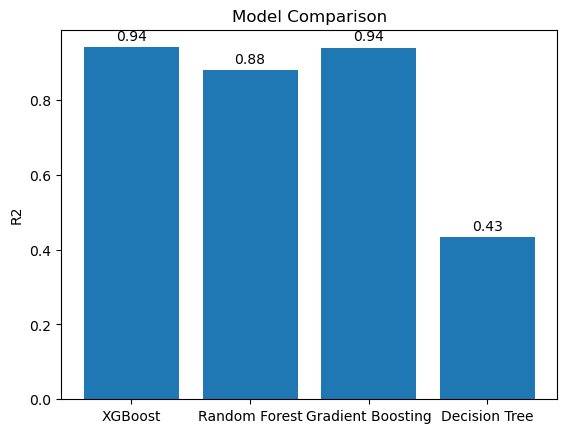

In [1046]:
models = ['XGBoost', 'Random Forest', 'Gradient Boosting', 'Decision Tree']
r2s = [r2_xg, r2_rf, r2_gb, r2_dt]

plt.bar(models, r2s)
plt.ylabel('R2')
plt.title('Model Comparison')
for i, r2 in enumerate(r2s):
    plt.text(i, r2 + 0.01, f'{r2:.2f}', ha='center', va='bottom')

plt.show()